# Wine dataset

It is well known that wine has motivated people to socialize, create, party, and adventure. It’s no wonder, billions of people around the globe identify as wine lovers!

In this dataset, we find 1600 wine references with the following features: 
* Fixed acidity
* Volatile acidity
* Citric acid
* Residual sugar
* Chlorides
* Free sulfur dioxide
* Total sulfur dioxide
* Density
* pH
* Sulphates
* Alcohol
* Quality

The goal of this project is to create clusters that group references by similarity. This way, we could classify a new wine reference, that has not been included in this analysis, in one of the clusters defined here.

In [1]:
import pandas as pd
%matplotlib inline

### Uploading dataset

In [2]:
data = pd.read_csv("winequality-red.csv", sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

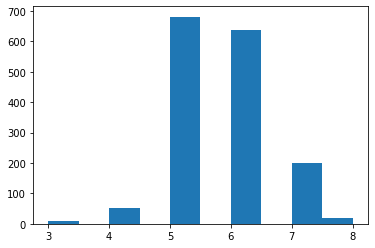

In [6]:
plt.hist(data["quality"])

In [7]:
data.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Data cleaning

In [191]:
def data_cleaning(data):
  unique_values = []
  na_values = []
  null_values = []
  columns = []

  for column in data.columns.values:
    unique_values.append(len(np.unique(data[column])))
    na_values.append(list(data[column].isna()).count(True))
    null_values.append(list(data[column].isnull()).count(True))
    columns.append(column)

  data_validated = pd.DataFrame(index=columns) 
  data_validated["unique_values"] = list(unique_values)
  data_validated["na_values"] = list(na_values)
  data_validated["null_values"] = list(null_values)
  return data_validated

In [192]:
data_cleaning(data)

,unique_values,na_values,null_values
fixed acidity,96,0,0
volatile acidity,143,0,0
citric acid,80,0,0
residual sugar,91,0,0
chlorides,153,0,0
free sulfur dioxide,60,0,0
total sulfur dioxide,144,0,0
density,436,0,0
pH,89,0,0
sulphates,96,0,0


### Normalizing dataset

In [243]:
columns_name = data.columns.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data),columns=columns_name)
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [244]:
data_norm.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

### Hierarchical Clustering

In [213]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [214]:
clus = AgglomerativeClustering(n_clusters = 6, linkage = "ward").fit(data_norm)
clus

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

Labels correponds to cluster's name

In [215]:
np.unique(pd.DataFrame(clus.labels_))

array([0, 1, 2, 3, 4, 5])

In [216]:
md_h = pd.Series(clus.labels_)
#clus_labels

Text(0, 0.5, 'Quantity')

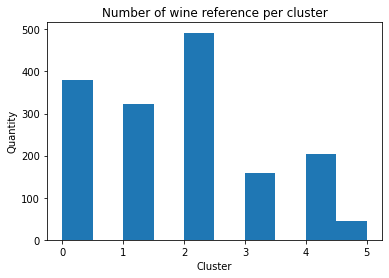

In [217]:
plt.hist(md_h)
plt.title("Number of wine reference per cluster")
plt.xlabel("Cluster")
plt.ylabel("Quantity")

In [218]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [219]:
Z = linkage(data_norm, method="ward",metric='euclidean')

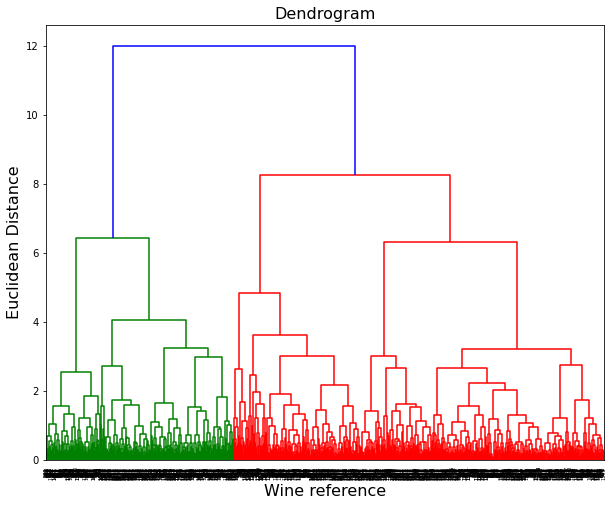

In [258]:
plt.figure(figsize=(10,8))
dendrogram(Z)
plt.xlabel("Wine reference",fontsize=16)
plt.ylabel("Euclidean Distance",fontsize=16)
plt.title("Dendrogram",fontsize=16)
plt.show()

### K-means Clustering

In [220]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [221]:
model = KMeans(n_clusters=6)
model.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [222]:
model.labels_

array([1, 1, 1, ..., 3, 1, 0], dtype=int32)

In [223]:
md_k = pd.Series(model.labels_)

In [246]:
data_norm["KMeans clustering"]=list(md_k)
data_norm["Clustering Hierarchical clustering"]=list(md_h)
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,KMeans clustering,Clustering Hierarchical clustering
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,1,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,5,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1,2


(array([232.,   0., 352.,   0., 303.,   0., 213.,   0., 276., 223.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

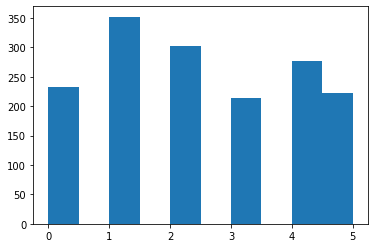

In [225]:
plt.hist(md_k)

(array([379.,   0., 322.,   0., 492.,   0., 158.,   0., 204.,  44.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

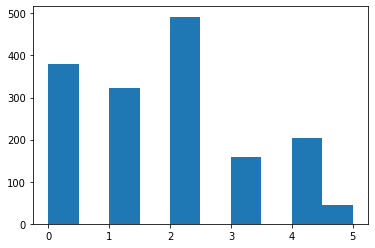

In [226]:
plt.hist(md_h)

* Centroids in Kmeans are available at *cluster_centers* attribute. So, for a dataset with 12 features, and for 6 clusters pre-defined, *cluster_centers* will give 6 arrays of 12 values per array, as many as features in original dataset

In [227]:
model.cluster_centers_

array([[0.36946903, 0.15456719, 0.43349138, 0.10702055, 0.10525445,
        0.1657965 , 0.08396795, 0.40450782, 0.41277491, 0.24001136,
        0.50537135, 0.71465517],
       [0.23732904, 0.38823163, 0.06823864, 0.09385702, 0.12075524,
        0.16523287, 0.10681015, 0.47964015, 0.52335361, 0.15143576,
        0.23554779, 0.42159091],
       [0.33143491, 0.27815453, 0.26831683, 0.09123378, 0.13571023,
        0.13656859, 0.12365159, 0.52156603, 0.41682908, 0.18950218,
        0.21221122, 0.49372937],
       [0.17316881, 0.31799473, 0.09610329, 0.09370378, 0.09512725,
        0.24856179, 0.12427213, 0.3168566 , 0.5782411 , 0.18543195,
        0.50056579, 0.61502347],
       [0.31816724, 0.27778191, 0.3076087 , 0.16162895, 0.12823305,
        0.4034752 , 0.31170943, 0.54055204, 0.43018943, 0.19011976,
        0.21848755, 0.45362319],
       [0.59176951, 0.20380552, 0.54721973, 0.13185699, 0.1693031 ,
        0.14659256, 0.09688   , 0.65673337, 0.31785601, 0.25031551,
        0.29718294,

### Conclusion

In [247]:
data_norm.groupby("KMeans clustering").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clustering Hierarchical clustering
KMeans clustering,,,,,,,,,,,,,
0,0.369469,0.154567,0.433491,0.107021,0.105254,0.165797,0.083968,0.404508,0.412775,0.240011,0.505371,0.714655,0.081897
1,0.237329,0.388232,0.068239,0.093857,0.120755,0.165233,0.106810,0.479640,0.523354,0.151436,0.235548,0.421591,2.136364
2,0.331435,0.278155,0.268317,0.091234,0.135710,0.136569,0.123652,0.521566,0.416829,0.189502,0.212211,0.493729,1.561056
3,0.173169,0.317995,0.096103,0.093704,0.095127,0.248562,0.124272,0.316857,0.578241,0.185432,0.500566,0.615023,3.450704
4,0.318167,0.277782,0.307609,0.161629,0.128233,0.403475,0.311709,0.540552,0.430189,0.190120,0.218488,0.453623,1.061594
5,0.591770,0.203806,0.547220,0.131857,0.169303,0.146593,0.096880,0.656733,0.317856,0.250316,0.297183,0.551570,2.439462


In [248]:
data_norm.groupby("Clustering Hierarchical clustering").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,KMeans clustering
Clustering Hierarchical clustering,,,,,,,,,,,,,
0,0.380858,0.171341,0.422691,0.109661,0.109928,0.178844,0.098362,0.450974,0.417198,0.226202,0.439821,0.653298,1.356201
1,0.311109,0.282598,0.299255,0.159683,0.126075,0.349926,0.283037,0.545567,0.441899,0.174080,0.203376,0.450932,3.506211
2,0.265613,0.356714,0.113557,0.091213,0.124109,0.147873,0.105073,0.486659,0.485132,0.156005,0.228685,0.455285,1.428862
3,0.644449,0.206477,0.548734,0.128576,0.124564,0.142271,0.098135,0.684780,0.301455,0.226218,0.296754,0.559494,4.841772
4,0.169313,0.344531,0.080000,0.089394,0.095731,0.253521,0.122151,0.329572,0.589432,0.182165,0.482944,0.578431,2.745098
5,0.335881,0.279577,0.405455,0.069894,0.430073,0.172535,0.184388,0.508911,0.274875,0.517148,0.171678,0.450000,3.295455


* A new wine reference would fit in one of the clusters created above. It can be set by Kmeans or Hierarchical clustering. For both technics, 6 groups or clusters where created because of feature similarities for each wine reference.  